# Real network

This notebook uses a real data set and demonstrates how karstnet can be used to:
- load the geometry of karstic network from two ASCII files;
- plot the geometry and its simplification;
- computes the statistical properties of the network (update aug. 2020 : and Howard's parameters);
- draw stereonets and Rose diagrams (update aug. 2020).

Nov. 2018 - Updated Aug. 2020


In [1]:
import karstnet as kn

### Load the data

The karstnet data importation functions are belonging to the "import_fc" module. 
To read a data file, different options are available. The simplest is 
the "from_nodlink_dat" function. The detailed help is shown below.

In [2]:
help( kn.import_fc.from_nodlink_dat )

Help on function from_nodlink_dat in module karstnet.import_fc:

from_nodlink_dat(basename, verbose=True)
    Creates the Kgraph from two ascii files (nodes, and links).
    
    Parameters
    ----------
    basename : string
        The base name used for the input files.
    
        The input files are named using the following convention:
         - basename_nodes.dat: the matrix of 3D node coordinates
           one line per node, one column per coordinates
    
         - basename_links.dat: the list of edges
    
    Returns
    -------
    KGraph
        A KGraph object
    
    Examples
    --------
       >>> myKGraph = kn.from_nodlink_dat("MyKarst")


In [3]:
# Load the data set 
sakany = kn.from_nodlink_dat( '../data/Sakany' )  # '../data/Sakany' is the base name to access the 2 input ASCII files


 This network contains  1  connected components

Graph successfully created from file !


This function loads two files:

``../data/Sakany_nodes.dat``

contains the list of coordinates for all the nodes, the nodes are implicitly number from 1 to the number of lines

``../data/Sakany_links.dat``
 
contains the list of links between nodes (the edges) each line contains two integers: the ID of the nodes for that edge

 After loading the nodes, and edges. Karstnet creates the graph structures and precompute several attributes
 such as the simplified graph, or distances along the network. It returns a karst graph object (KGraph).

### Visual check

Karstnet offers a set of simple functions to check that the data that you just loaded have been properly imported. 

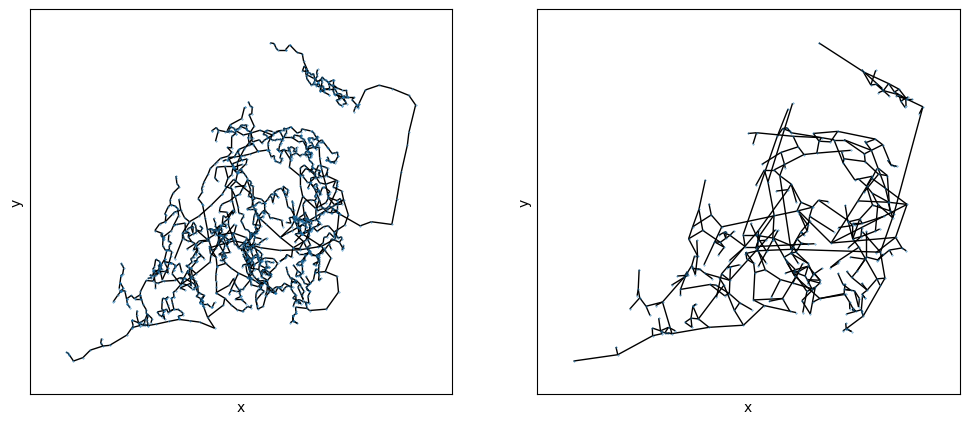

In [4]:
# Simple map view of original data (left) and simplified graph (right)
sakany.plot()

A rapid inspection of the figure may show some issues, and to refine the analysis one may wish to go a step further with 3D visualization of the network. 

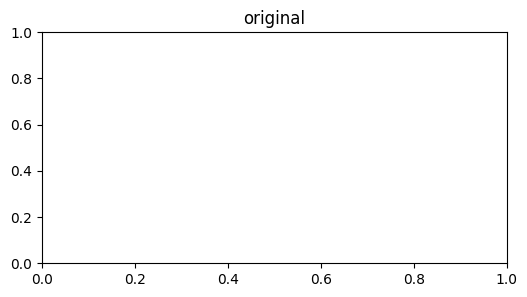

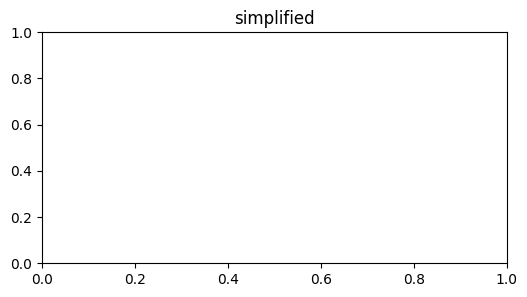

In [11]:
# Visualization of the original data
sakany.plot3(zrotation=60, xyrotation=10)

# Visualization of the simplified network 
sakany.plot3(graph_type=1, zrotation=60, xyrotation=10)

### Computing the statistical metrics

The simplest way to obtain all the statistics for that graph is to call the characterize_graph function as follows.

In [6]:
results = sakany.characterize_graph( verbose=True )

Computing:
 - mean length,cv length,length entropy,mean tortuosity

 - orientation entropy,aspl,cpd,md,cv degree,cvd
--------------------------------------
               mean length = 20.706
                 cv length = 0.915
            length entropy = 0.377
                tortuosity = 1.401
       orientation entropy = 0.992
                      aspl = 12.619
                       cpd = 0.268
               mean degree = 2.395
                 cv degree = 0.471
 correlation vertex degree = -0.168
--------------------------------------


Update 2020: the function basic_analysis also provides basic values (nodes, edges, cycles and Howard's parameters) on the corresponding graphs

In [7]:
sakany.basic_analysis()


 This network contains :
 1716  nodes (stations) and  1784  edges.
  On the simplified graph, there are :  344  nodes (stations) and  412  edges,
 111  are extremity nodes (entries or exits) and  182  are junction nodes.
There is/are  1  connected component.s and  69  cycle.s.


Howard's parameter are (Howard, 1970) :  
 alpha:  0.10102489019033675 
 beta 1.197674418604651 
 gamma 0.4015594541910331

Note that this computation considers the node of degree 2  necessary to loop preservations as Seed Nodes, in order to  stay consistent with Howard's illustrations.


### Draw Stereonet and Rose diagram

Thanks to our colleague P. Vernant (Montpellier) and the open-source mplstereonet library (https://github.com/joferkington/mplstereonet), it is now possible to draw stereonet and Rose diagrams. Note that, as in the paper of Collon et al. (2017 - https://doi.org/10.1016/j.geomorph.2017.01.034) Density map values are weigthed by the real 3D length of the segments, while the Rose diagram is weigthed by the 2D projected lengths of segments on the horizontal plane.

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

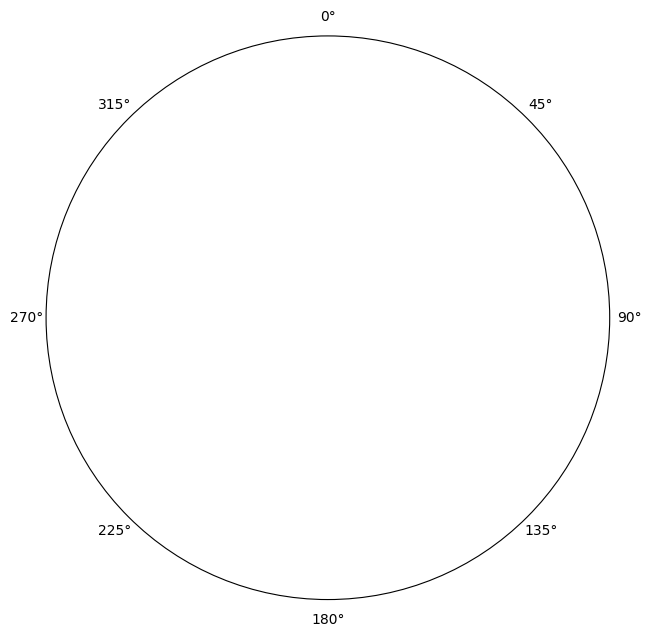

In [8]:
sakany.stereo()

To get Stereo and Rose diagram without weigthing by the lengths of the conduits, the option "weighted = False" can be used. As seen here, ignoring it can have a non negligeable impact...

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

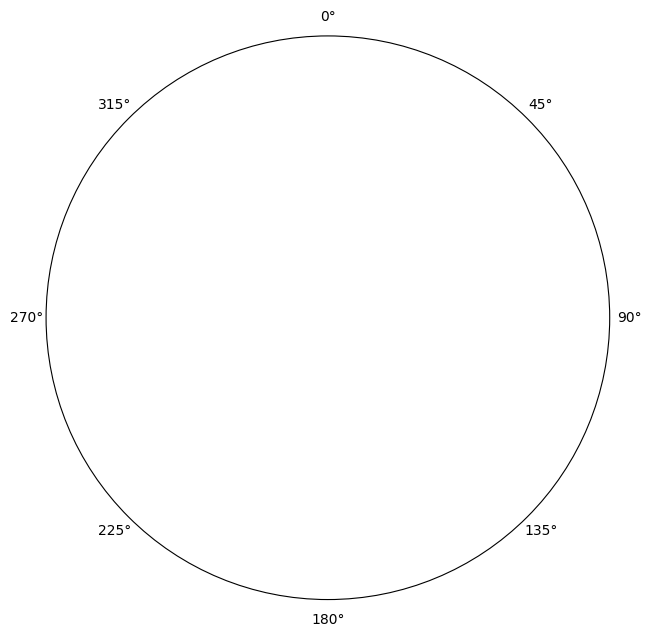

In [9]:
sakany.stereo(weighted = False)

In [10]:
monachou = kn.from_pline ('../data/Monachou.pl')


 This network contains  1  connected components

Graph successfully created from file !
